In [56]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as cm
from utils.information_processing_capacity import single_input_ipc

##### input #####
Two = 10000
T = int(1e6)
np.random.seed(0)
zeta = 2*np.random.rand(Two+T)-1
print('zeta',zeta,zeta.shape)

zeta [ 0.09762701  0.43037873  0.20552675 ...  0.61867435 -0.30313547
 -0.51697079] (1010000,)


In [5]:
# NARMA10
sigma = 0.45
u = sigma*0.5*(zeta+1)	# u in [0,sigma]
z = np.zeros(Two+T)
for t in range(1,Two+T):
	z[t] = 0.3*z[t-1] + 0.05*z[t-1]*np.sum(z[t-10:t]) + 1.5*u[t-1]*u[t-10] + 0.1

In [4]:
##### Parameters for esn #####
N = 50
p = 0.5
pin = 0.1
iota = 0.1
rhos = 0.1*np.arange(1,13)
#weight
p = 0.5
pin = 0.1
seed = 0
np.random.seed(seed)
win = (2*np.random.rand(N)-1) * (np.random.rand(N)<pin)
w = (2*np.random.rand(N,N)-1) * (np.random.rand(N,N)<p)
eig,eigv = np.linalg.eig(w)
w = w/np.max(np.abs(eig))

# Parameters for IPC
poly = 'legendre'
distr = 'uniform'
degdelays = [[1,2000],[2,300],[3,50],[4,30],[5,15]]#[1,3,5,7]

ipc_target = single_input_ipc(zeta,Two,degdelays,poly=poly,distr=distr)
ipc_state = single_input_ipc(zeta,Two,degdelays,poly=poly,distr=distr)
ipc_out = single_input_ipc(zeta,Two,degdelays,poly=poly,distr=distr)
pkldir = 'ipc/pkl'


In [57]:
'''
'''
##### Compute IPC of NARMA10 #####
ipc_target.svd(z)
path = '%s/target_%5.3f'%(pkldir,sigma)
ipc_target.save_config(path)
Ctot = 0
for deg,delay in degdelays:
	ipcs,surs = ipc_target.compute(deg,delay)
	truncated = ipc_target.threshold(ipcs,surs,deg,delay,th_scale=1.2)
	Ctot_deg = np.sum(truncated['ipcs'].values)
	print('deg',deg,'delay',delay,'Ctot(d)',Ctot_deg)
	Ctot += Ctot_deg
print('degs',ipc_target.degs,'Ctot',Ctot,'rank',ipc_target.rank)
print('--------------------------------------------------------------------------------\n\n\n')

for rho in rhos:
	print('Spectral radius',rho)
	
	# ESN
	x = np.zeros((N,Two+T))
	for t in range(1,Two+T):
		x[:,t] = np.tanh(rho*w.dot(x[:,t-1])+iota*win*zeta[t-1])

	# Linear regression
	X = x[:,Two:]
	Z = z[Two:]
	XX = np.linalg.pinv(X.dot(X.T))
	zhat = x.T.dot(XX).dot(X.dot(Z))
	mse = np.mean((Z-zhat[Two:])**2)
	nmse = mse/np.var(Z)
	print('NARMA10 NMSE',nmse)

	##### Compute IPC of ESN state #####
	ipc_state.svd(x)
	path = '%s/state_%d_%5.3f_%5.3f_%5.3f_%5.3f'%(pkldir,N,p,pin,rho,iota)
	ipc_state.save_config(path)
	Ctot = 0
	for deg,delay in degdelays:
		ipcs,surs = ipc_state.compute(deg,delay)
		truncated = ipc_state.threshold(ipcs,surs,deg,delay,th_scale=1.2)
		Ctot_deg = np.sum(truncated['ipcs'].values)
		print('deg',deg,'delay',delay,'Ctot(d)',Ctot_deg)
		Ctot += Ctot_deg
	print('degs',ipc_state.degs,'Ctot',Ctot,'rank',ipc_state.rank)
	print('--------------------------------------------------------------------------------\n\n\n')

	##### Compute IPC of ESN output #####
	ipc_out.svd(zhat)
	path = '%s/out_%d_%5.3f_%5.3f_%5.3f_%5.3f'%(pkldir,N,p,pin,rho,iota)
	ipc_out.save_config(path)
	Ctot = 0
	for deg,delay in degdelays:
		ipcs,surs = ipc_out.compute(deg,delay)
		truncated = ipc_out.threshold(ipcs,surs,deg,delay,th_scale=1.2)
		Ctot_deg = np.sum(truncated['ipcs'].values)
		print('deg',deg,'delay',delay,'Ctot(d)',Ctot_deg)
		Ctot += Ctot_deg
	print('degs',ipc_out.degs,'Ctot',Ctot,'rank',ipc_out.rank)
	print('--------------------------------------------------------------------------------\n\n\n')
'''
'''

{'N': 1, 'T': 1000000, 'Two': 10000, 'Nseed': 200, 'degdelays': [[1, 2000], [2, 300], [3, 50], [4, 30], [5, 15]], 'zerobased': True, 'poly': 'legendre', 'distr': 'uniform', 'thresh': 'N', 'finfo': 2.220446049250313e-16, 'rank': 1}
     degdelaysets      ipcs
1        [[1, 1]]  0.282402
2        [[1, 2]]  0.066684
3        [[1, 3]]  0.018371
4        [[1, 4]]  0.006375
5        [[1, 5]]  0.002934
6        [[1, 6]]  0.001790
7        [[1, 7]]  0.001471
8        [[1, 8]]  0.001464
9        [[1, 9]]  0.001421
10      [[1, 10]]  0.325264
11      [[1, 11]]  0.088102
12      [[1, 12]]  0.027427
13      [[1, 13]]  0.010546
14      [[1, 14]]  0.005250
15      [[1, 15]]  0.003325
16      [[1, 16]]  0.002752
17      [[1, 17]]  0.002466
18      [[1, 18]]  0.002301
19      [[1, 19]]  0.002038
20      [[1, 20]]  0.002253
21      [[1, 21]]  0.001465
22      [[1, 22]]  0.000964
23      [[1, 23]]  0.000650
24      [[1, 24]]  0.000388
25      [[1, 25]]  0.000301
26      [[1, 26]]  0.000211
27      [[1, 

'\n'

If you focus on particular targets, you can pick up their individual IPCs using `get_individuals()`. 
You need to include terms you want in its argument `degdelaysets`. 

In [58]:
degdelaysets_1 = [ [[1,1]], [[1,2]], [[1,3]], [[1,10]], [[1,11]], [[1,12]] ] #1st-order
degdelaysets_2 = [ [[1,1],[1,10]], [[1,2],[1,11]], [[1,3],[1,12]] ] #2nd-order
degdelaysets = degdelaysets_1 + degdelaysets_2
nmax = len(degdelays) + np.sum([len(ddset) for ddset in degdelaysets])

# State
npzname = 'ipc/npz/state_%d_%5.3f_%5.3f_%5.3f.npz'%(N,p,pin,iota)
paths = []
for rho in rhos:
	path = '%s/state_%d_%5.3f_%5.3f_%5.3f_%5.3f'%(pkldir,N,p,pin,rho,iota)
	paths.append(path)
ipc_state.get_indicators(npzname,paths,th_scale=1.2)
ipc_state.get_individuals(degdelaysets,paths,th_scale=1.2)

# Target
npzname = 'ipc/npz/target_%5.3f.npz'%(sigma)
paths = [ '%s/target_%5.3f'%(pkldir,sigma) ]
ipc_target.get_indicators(npzname,paths,th_scale=1.2)
ipc_target.get_individuals(degdelaysets,paths,th_scale=1.2)

# Output
npzname = 'ipc/npz/out_%d_%5.3f_%5.3f_%5.3f.npz'%(N,p,pin,iota)
paths = []
for rho in rhos:
	path = '%s/out_%d_%5.3f_%5.3f_%5.3f_%5.3f'%(pkldir,N,p,pin,rho,iota)
	paths.append(path)
ipc_out.get_indicators(npzname,paths,th_scale=1.2)
ipc_out.get_individuals(degdelaysets,paths,th_scale=1.2)


{'ipcs_degree': array([[7.02924919e+00, 2.18481533e-03, 8.97806211e+00, 2.08038951e-02,
        1.48914206e-02],
       [9.97890554e+00, 8.56814230e-04, 1.50251503e+01, 2.76288128e-02,
        2.37992887e-02],
       [1.22972578e+01, 4.51619167e-04, 1.97124907e+01, 3.50035233e-02,
        4.94126048e-02],
       [1.48541497e+01, 2.73357557e-04, 2.61625195e+01, 4.38608815e-02,
        6.71379450e-02],
       [1.67909528e+01, 5.09856546e-04, 3.22319563e+01, 5.01718329e-02,
        7.61135853e-02],
       [1.82680786e+01, 5.30247078e-04, 3.17558473e+01, 6.47047342e-02,
        6.73239072e-02],
       [2.06638881e+01, 0.00000000e+00, 2.93711673e+01, 3.72339060e-02,
        6.14036164e-02],
       [2.40030670e+01, 8.01231055e-04, 2.60528094e+01, 1.00778729e-02,
        4.81909098e-02],
       [2.74534690e+01, 5.14757674e-04, 2.26719770e+01, 8.14645960e-03,
        4.93508644e-02],
       [2.67426214e+01, 3.94880261e-04, 5.33967653e+00, 3.96986121e-03,
        1.04870937e-02],
       [1.2065

After running `get_individuals()`, you can refer to a variable `indiv`, which contains individual IPCs you specified with `degdelays` and summarized rest IPCs for each degree as follows:  

In [59]:
ipc_target.indiv

,deg,degdelaysets,0
0,1,"{{1, 1}}",0.282402
1,1,"{{1, 2}}",0.066684
2,1,"{{1, 3}}",0.018371
3,1,"{{1, 10}}",0.325264
4,1,"{{1, 11}}",0.088102
5,1,"{{1, 12}}",0.027427
6,1,Rest of 1st,0.051093
7,2,"{{1, 1}, {1, 10}}",0.095676
8,2,"{{1, 2}, {1, 11}}",0.024275
9,2,"{{1, 3}, {1, 12}}",0.007198


In [60]:
ipc_out.indiv

,deg,degdelaysets,0,1,2,3,4,5,6,7,8,9,10,11
0,1,"{{1, 1}}",0.728837,0.381733,0.332460,0.328736,0.326430,0.325328,0.323403,0.321636,0.320941,0.321317,0.387144,0.355129
1,1,"{{1, 2}}",0.176041,0.092291,0.080413,0.079483,0.078927,0.078655,0.078189,0.077762,0.077595,0.077675,0.099663,0.070653
2,1,"{{1, 3}}",0.050522,0.026487,0.023063,0.022804,0.022650,0.022573,0.022440,0.022317,0.022268,0.022294,0.029113,0.018050
3,1,"{{1, 10}}",0.000000,0.438864,0.382254,0.378013,0.375320,0.374298,0.372177,0.369993,0.369267,0.365546,0.193051,0.083750
4,1,"{{1, 11}}",0.000000,0.007540,0.105649,0.104359,0.103586,0.103216,0.102815,0.102228,0.102034,0.099415,0.020543,0.001544
5,1,"{{1, 12}}",0.000000,0.000097,0.035236,0.033398,0.033180,0.033035,0.032986,0.032868,0.032800,0.032341,0.016977,0.007519
6,1,Rest of 1st,0.042897,0.025476,0.032024,0.046959,0.053573,0.056746,0.061130,0.067536,0.069856,0.075416,0.158131,0.098039
7,2,"{{1, 1}, {1, 10}}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2,"{{1, 2}, {1, 11}}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2,"{{1, 3}, {1, 12}}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [61]:
ipc_state.indiv

,deg,degdelaysets,0,1,2,3,4,5,6,7,8,9,10,11
0,1,"{{1, 1}}",0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999990,0.995015,0.979136
1,1,"{{1, 2}}",0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999997,0.999977,0.981842,0.941439
2,1,"{{1, 3}}",0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999997,0.999959,0.970681,0.889087
3,1,"{{1, 10}}",0.000000,0.963896,0.999936,0.999989,0.999993,0.999988,0.999971,0.999965,0.999907,0.993515,0.614107,0.368102
4,1,"{{1, 11}}",0.000000,0.014841,0.999323,0.999978,0.999983,0.999952,0.999930,0.999923,0.999820,0.991240,0.558399,0.344477
5,1,"{{1, 12}}",0.000000,0.000868,0.954702,0.999274,0.999899,0.999907,0.999792,0.999735,0.999547,0.985839,0.429703,0.198794
6,1,Rest of 1st,4.029256,5.999307,6.343303,8.854915,10.791084,12.268238,14.664202,18.003451,21.454203,20.772103,7.515414,5.022328
7,2,"{{1, 1}, {1, 10}}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2,"{{1, 2}, {1, 11}}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2,"{{1, 3}, {1, 12}}",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000206


/tmp/ipykernel_1740550/95043044.py:17: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax1.bar(scales,caps[i],width=1,bottom=bottom,label=labels[i],color=colors[i],ec='')
/tmp/ipykernel_1740550/95043044.py:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax2.bar(rhos,caps[i],width=0.1,bottom=bottom,label=labels[i],color=colors[i],ec='')
/tmp/ipykernel_1740550/95043044.py:54: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax3.bar(rhos,caps[i],width=0.1,bottom=bottom,label=labels[i],color=colors[i],ec='')


['{{1, 1}}' '{{1, 2}}' '{{1, 3}}' '{{1, 10}}' '{{1, 11}}' '{{1, 12}}'
 'Rest of 1st' '{{1, 1}, {1, 10}}' '{{1, 2}, {1, 11}}' '{{1, 3}, {1, 12}}'
 'Rest of 2nd' '3rd' '4th' '5th']


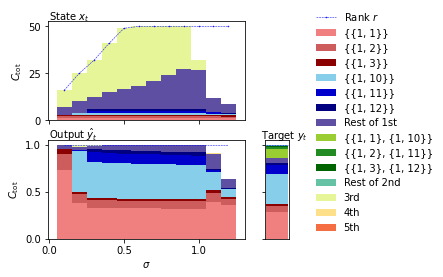

In [62]:
fig = plt.figure()
spec = gridspec.GridSpec(ncols=3,nrows=2,width_ratios=[8,1,3])

colors = ['lightcoral','indianred','darkred',
		'skyblue','mediumblue','navy',cm.Spectral_r(0),
		'yellowgreen','forestgreen','darkgreen',cm.Spectral_r(1/5),
		cm.Spectral_r(2/5),cm.Spectral_r(3/5),cm.Spectral_r(4/5),]

ax1 = fig.add_subplot(spec[4])
scales = np.arange(1)
Nindiv = ipc_target.indiv.values.shape[0]
caps = ipc_target.indiv.loc[:,0:].values
labels = str(ipc_target.indiv['degdelaysets'].values)

bottom = np.zeros(scales.shape)
for i in range(Nindiv):
	ax1.bar(scales,caps[i],width=1,bottom=bottom,label=labels[i],color=colors[i],ec='')
	bottom += caps[i]
ax1.plot([-0.5,0.5],[ipc_target.ranks]*2,c='b',ls='--',marker='',lw=0.5)
ax1.set_xticks([])
ax1.set_yticks([0,0.5,1])
ax1.set_yticklabels([])
ax1.text(-0.7,1.07,r'Target $y_t$')


ax2 = fig.add_subplot(spec[0])

Nindiv = ipc_state.indiv.values.shape[0]
caps = ipc_state.indiv.loc[:,0:].values
labels = ipc_state.indiv['degdelaysets'].values
print(labels)
bottom = np.zeros(rhos.shape)
for i in range(Nindiv):
	ax2.bar(rhos,caps[i],width=0.1,bottom=bottom,label=labels[i],color=colors[i],ec='')
	bottom += caps[i]
ax2.plot(rhos,ipc_state.ranks,c='b',ls='--',marker='.',ms=1,lw=0.5,label=r'Rank $r$')
ax2.set_xticks([0,0.5,1])
ax2.set_xticklabels([])
ax2.set_yticks([0,25,50])
ax2.set_ylabel(r'$C_{\rm tot}$')
# ax2.legend(loc='best',frameon=False,ncol=2)
ax2.legend(loc='upper right',frameon=False,ncol=1,bbox_to_anchor=(2.,1.2))
ax2.text(0,53.5,r'State $x_t$')


ax3 = fig.add_subplot(spec[3])

Nindiv = ipc_out.indiv.values.shape[0]
caps = ipc_out.indiv.loc[:,0:].values
labels = ipc_out.indiv['degdelaysets'].values

bottom = np.zeros(rhos.shape)
for i in range(Nindiv):
	ax3.bar(rhos,caps[i],width=0.1,bottom=bottom,label=labels[i],color=colors[i],ec='')
	bottom += caps[i]
ax3.plot(rhos,ipc_out.ranks,c='b',ls='--',marker='',lw=0.5)
ax3.set_xticks([0,0.5,1])
ax3.set_yticks([0,0.5,1])
ax3.set_xlabel(r'$\sigma$')
ax3.set_ylabel(r'$C_{\rm tot}$')
ax3.text(0,1.07,r'Output $\hat{y}_t$')

plt.savefig('sample3_individual.png',dpi=300,facecolor="w",edgecolor="w")
